<Figure size 432x288 with 0 Axes>

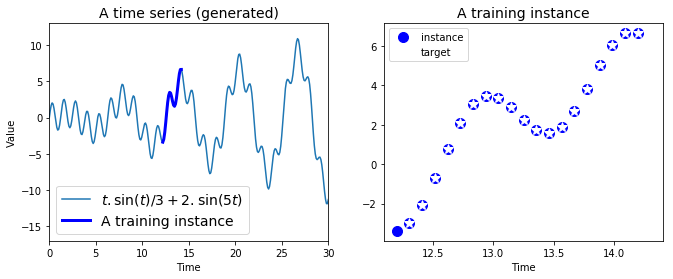

0 	MSE: 18.25908
100 	MSE: 11.370888
200 	MSE: 13.685039
300 	MSE: 9.412176
400 	MSE: 10.49321
500 	MSE: 12.507117
600 	MSE: 11.109693
700 	MSE: 10.347655
800 	MSE: 9.155826
900 	MSE: 11.682226
1000 	MSE: 9.019257
1100 	MSE: 12.382185
1200 	MSE: 12.491596
1300 	MSE: 9.054201
1400 	MSE: 11.567972
1500 	MSE: 11.885813
1600 	MSE: 10.40395
1700 	MSE: 7.9610305
1800 	MSE: 9.883352
1900 	MSE: 10.322096
2000 	MSE: 12.277015
2100 	MSE: 10.288569
2200 	MSE: 8.570976
2300 	MSE: 11.890319
2400 	MSE: 12.363077
2500 	MSE: 8.553039
2600 	MSE: 9.58414
2700 	MSE: 13.766942
2800 	MSE: 10.713673
2900 	MSE: 10.094316
3000 	MSE: 9.149993
3100 	MSE: 9.521551
3200 	MSE: 12.009611
3300 	MSE: 9.810854
3400 	MSE: 11.7548
3500 	MSE: 8.541228
3600 	MSE: 11.084301
3700 	MSE: 10.554598
3800 	MSE: 9.900852
3900 	MSE: 8.157031
4000 	MSE: 11.141988
4100 	MSE: 10.107334
4200 	MSE: 12.025078
4300 	MSE: 8.7994585
4400 	MSE: 9.658931
4500 	MSE: 7.9658427
4600 	MSE: 9.672447
4700 	MSE: 11.856991
4800 	MSE: 9.682814
4900 	

In [3]:
from tensorflow.contrib.layers import fully_connected
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#defining the time series#
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)


#plotting it#

fig = plt.figure()

t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")

fig.savefig("time_series_plot")
plt.show()
 
    
#defining the RNN variables#
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1


#placeholders for inputs and final#
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])


#generating the RNN dynamically#
cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)


#wrapping BasicRNNCell into OutputProjectionWrapper#
cell = tf.contrib.rnn.OutputProjectionWrapper(
 tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
 output_size=n_outputs)


#creating the optimiser#
learning_rate = 0.001
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()


#execution phase#
n_iterations = 10000
batch_size = 50
with tf.Session() as sess:
 init.run()
 for iteration in range(n_iterations):
  X_batch, y_batch = next_batch(batch_size, n_steps)
  sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
  if iteration % 100 == 0:
   mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
   print(iteration, "\tMSE:", mse)